<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...

#Etape 1 - Importation des librairies et chargement des fichiers

##1.1 - Importation des librairies

In [2]:
#Importation de la librairie Pandas
import pandas as pd

In [3]:
#Importation de la librairie plotly express
import plotly.express as px

In [ ]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium

In [4]:
# Afficher toutes les colonnes
pd.set_option('display.max_columns', None)

##1.2 - Chargements des fichiers

In [5]:
#Importation du fichier web.xlsx
df_web = pd.read_excel("web.xlsx")
#Importation du fichier erp.xlsx
df_erp = pd.read_excel("erp.xlsx")
#importation du fichier liaison.xlsx
df_liaison = pd.read_excel("liaison.xlsx")

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [6]:
# Afficher le DataFrame
display(df_erp)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77
...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,23.48
821,7204,0,45.0,9,instock,24.18
822,7247,1,54.8,6,instock,27.18
823,7329,0,26.5,14,instock,13.42


#Etape 2 - Analyse exploratoire des fichiers

##2.1 - Analyse exploratoire du fichier erp.xlsx

In [ ]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [ ]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes


In [ ]:
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))
print(50*'-')
print(df_erp.dtypes)
print(50*'-')
print(df_erp.count())
print(50*'-')
print(df_erp.isnull().sum())

Le tableau comporte 6 colonne(s)
--------------------------------------------------
product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
purchase_price    float64
dtype: object
--------------------------------------------------
product_id        825
onsale_web        825
price             825
stock_quantity    825
stock_status      825
purchase_price    825
dtype: int64
--------------------------------------------------
product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
purchase_price    0
dtype: int64


In [ ]:
#Afficher les 5 premières lignes de la table


In [ ]:
print(df_erp.head())

   product_id  onsale_web  price  stock_quantity stock_status  purchase_price
0        3847           1   24.2              16      instock           12.88
1        3849           1   34.3              10      instock           17.54
2        3850           1   20.8               0   outofstock           10.64
3        4032           1   14.1              26      instock            6.92
4        4039           1   46.0               3   outofstock           23.77


In [ ]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
# Vérifier s'il y a des doublons dans le DataFrame entier

In [ ]:
# Vérifier s'il y a des doublons dans le DataFrame entier

print("Le DataFrame contient {} doublon(s).".format(df_erp.duplicated(subset=['product_id']).sum()))

Le DataFrame contient 0 doublon(s).


In [ ]:
#Afficher les valeurs distinctes de la colonne stock_status
#À quelle(s) autre(s) colonne(s) sont-elles liées ?


In [7]:
#Afficher les valeurs distinctes de la colonne stock_status
print(df_erp['stock_status'].unique())

['instock' 'outofstock']


In [ ]:
#Création d'une colonne "stock_status_2
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"


In [ ]:
import numpy as np
df_erp['stock_status_2'] = np.where(df_erp['stock_quantity'] == 0, 'outofstock', 'instock')
print(df_erp)

     product_id  onsale_web  price  stock_quantity stock_status  \
0          3847           1   24.2              16      instock   
1          3849           1   34.3              10      instock   
2          3850           1   20.8               0   outofstock   
3          4032           1   14.1              26      instock   
4          4039           1   46.0               3   outofstock   
..          ...         ...    ...             ...          ...   
820        7203           0   45.0              30      instock   
821        7204           0   45.0               9      instock   
822        7247           1   54.8               6      instock   
823        7329           0   26.5              14      instock   
824        7338           1   16.3              40      instock   

     purchase_price stock_status_2  
0             12.88        instock  
1             17.54        instock  
2             10.64     outofstock  
3              6.92        instock  
4         

In [ ]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

,0
0,True
1,True
2,True
3,True
4,False
...,...
820,True
821,True
822,True
823,True


In [ ]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset

In [ ]:
total_identique = (df_erp["stock_status"] == df_erp["stock_status_2"]).sum()
print(f"Nombre de valeurs identiques : {total_identique}")

Nombre de valeurs identiques : 821


In [ ]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3

In [ ]:
df_ecarts = df_erp[df_erp["stock_status"] != df_erp["stock_status_2"]]
nb_ecarts = df_ecarts.shape[0]
print(f"Nombre de lignes en écart : {nb_ecarts}")
df_ecarts[['stock_quantity', 'stock_status', 'stock_status_2']].head()

Nombre de lignes en écart : 4


,stock_quantity,stock_status,stock_status_2
4,3,outofstock,instock
398,0,instock,outofstock
449,-10,outofstock,instock
573,-1,outofstock,instock


In [ ]:
#Corriger la ou les données incohérentes

#Verification en utilisant le même code que plus haut pour afficher les problemes


In [ ]:
df_erp['stock_status_2'] = np.where(df_erp['stock_quantity'] <= 0, 'outofstock', 'instock')
nb_ecarts_apres = (df_erp["stock_status"] != df_erp["stock_status_2"]).sum()
print(f"Nombre de lignes encore incohérentes après correction : {nb_ecarts_apres}")

Nombre de lignes encore incohérentes après correction : 2


In [ ]:
display(df_erp[['product_id', 'stock_quantity', 'stock_status', 'stock_status_2']])

,product_id,stock_quantity,stock_status,stock_status_2
0,3847,16,instock,instock
1,3849,10,instock,instock
2,3850,0,outofstock,outofstock
3,4032,26,instock,instock
4,4039,3,outofstock,instock
...,...,...,...,...
820,7203,30,instock,instock
821,7204,9,instock,instock
822,7247,6,instock,instock
823,7329,14,instock,instock


###2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx

####2.1.1.1 - Analyse de la variable PRIX

In [ ]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
#Afficher le ou les prix non renseignés dans la colonne "price"
#print("Nombres d'article avec un prix non renseignés: {}".format())
#Saisir l'instruction manquante dans la fonction format
#Afficher le prix minimum de la colonne "price"

#Afficher le prix maximum de la colonne "price"

#Affichier les prix inférieurs à 0 (qu'est ce qu'il faut en faire ?)


In [ ]:
print("Nombre de prix négatifs : {}".format((df_erp['price'] < 0).sum()))
print("Nombre de prix à 0 : {}".format((df_erp['price'] == 0).sum()))
print("Nombre de prix nuls : {}".format((df_erp['price'].isna().sum())))


Nombre de prix négatifs : 3
Nombre de prix à 0 : 0
Nombre de prix nuls : 0


In [ ]:
print("Nombres d'article avec un prix non renseignés: {}".format((df_erp['price'] < 0).sum()))
print("Le prix minimum est de : {}".format(df_erp['price'].min()))
print("Le prix maximum est de : {}".format(df_erp['price'].max()))

Nombres d'article avec un prix non renseignés: 3
Le prix minimum est de : -20.0
Le prix maximum est de : 225.0


In [ ]:
df_prix_negatifs = df_erp[df_erp['price'] < 0]
display(df_prix_negatifs)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
151,4233,0,-20.0,0,outofstock,10.33,outofstock
469,5017,0,-8.0,0,outofstock,4.34,outofstock
739,6594,0,-9.1,19,instock,4.61,instock


In [ ]:
#Correction de la faute de frappe.
df_erp.loc[df_erp['price'] < 0, 'price'] = -df_erp['price']
df_prix_negatifs = df_erp[df_erp['price'] < 0]
display(df_prix_negatifs)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2


####2.1.1.2 - Analyse de la variable STOCK

In [ ]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"

#Afficher la quantité maximum de la colonne "stock_quantity"

#Affichier les stocks inférieurs à 0 (qu'est ce qu'il faut en faire ?)


In [ ]:
print("Nombre de valeurs négatives dans stock_quantity : {}".format((df_erp['stock_quantity'] < 0).sum()))
print("Nombre de valeurs NaN dans stock_quantity : {}".format((df_erp['stock_quantity'].isna().sum())))
print("Le stock minimum est de : {}".format(df_erp['stock_quantity'].min()))
print("Le stock maximum est de : {}".format(df_erp['stock_quantity'].max()))


Nombre de valeurs négatives dans stock_quantity : 2
Nombre de valeurs NaN dans stock_quantity : 0
Le stock minimum est de : -10
Le stock maximum est de : 145


In [ ]:
df_stock_negatifs = df_erp[df_erp['stock_quantity'] < 0]
display(df_stock_negatifs[['product_id', 'stock_quantity', 'stock_status']])

,product_id,stock_quantity,stock_status
449,4973,-10,outofstock
573,5700,-1,outofstock


In [ ]:
display(df_erp)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
0,3847,1,24.2,16,instock,12.88,instock
1,3849,1,34.3,10,instock,17.54,instock
2,3850,1,20.8,0,outofstock,10.64,outofstock
3,4032,1,14.1,26,instock,6.92,instock
4,4039,1,46.0,3,outofstock,23.77,instock
...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,23.48,instock
821,7204,0,45.0,9,instock,24.18,instock
822,7247,1,54.8,6,instock,27.18,instock
823,7329,0,26.5,14,instock,13.42,instock


####2.1.1.3 - Analyse de la variable ONSALE_WEB

In [ ]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
print("Valeurs uniques dans onsale_web :", df_erp['onsale_web'].unique())
display(df_erp['onsale_web'].value_counts())
#La colonne permet d'identifier si les produits sont en vente en ligne (1) ou non (0)

Valeurs uniques dans onsale_web : [1 0]


,count
onsale_web,
1,716
0,109


In [ ]:
#Quelles sont les colonnes à conserver selon vous?


In [ ]:
#Supprimer la colonne comportant le libellé "onsale_web" afin de respecter les normes RGPD
df_erp.drop(columns=['onsale_web'], inplace=True)
display(df_erp.head())

,product_id,price,stock_quantity,stock_status,purchase_price,stock_status_2
0,3847,24.2,16,instock,12.88,instock
1,3849,34.3,10,instock,17.54,instock
2,3850,20.8,0,outofstock,10.64,outofstock
3,4032,14.1,26,instock,6.92,instock
4,4039,46.0,3,outofstock,23.77,instock


In [ ]:
# Remplacer les valeurs de stock_status par celles de stock_status_2
df_erp['stock_status'] = df_erp['stock_status_2']

# Vérifier la mise à jour
print("Mise à jour effectuée : 'stock_status' remplacé par 'stock_status_2'")
display(df_erp[['stock_quantity', 'stock_status', 'stock_status_2']].head(10))

Mise à jour effectuée : 'stock_status' remplacé par 'stock_status_2'


,stock_quantity,stock_status,stock_status_2
0,16,instock,instock
1,10,instock,instock
2,0,outofstock,outofstock
3,26,instock,instock
4,3,instock,instock
5,12,instock,instock
6,12,instock,instock
7,15,instock,instock
8,0,outofstock,outofstock
9,5,instock,instock


In [ ]:
# Suppression de la colonne 'stock_status_2'
df_erp.drop(columns=['stock_status_2'], inplace=True)

# Vérification de la suppression
print("Colonne 'stock_status_2' supprimée.")
display(df_erp.head(10))  # Afficher les 10 premières lignes pour vérifier


Colonne 'stock_status_2' supprimée.


,product_id,price,stock_quantity,stock_status,purchase_price
0,3847,24.2,16,instock,12.88
1,3849,34.3,10,instock,17.54
2,3850,20.8,0,outofstock,10.64
3,4032,14.1,26,instock,6.92
4,4039,46.0,3,instock,23.77
5,4040,34.3,12,instock,18.25
6,4041,32.7,12,instock,17.57
7,4042,31.2,15,instock,15.48
8,4043,60.0,0,outofstock,29.45
9,4045,42.6,5,instock,22.01


In [ ]:
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   price           825 non-null    float64
 2   stock_quantity  825 non-null    int64  
 3   stock_status    825 non-null    object 
 4   purchase_price  825 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 32.4+ KB


####2.1.1.4 - Analyse de la variable prix d'achat

In [ ]:
######################
##   prix d'achat   ##
######################

#Vérification de la colonne purchase_price :
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"

#Afficher le prix minimum de la colonne "purchase_price"

#Afficher le prix maximum de la colonne "purchase_price"


In [ ]:
print("Nombres d'article avec un prix d'achat non renseignés: {}".format(df_erp['purchase_price'].isna().sum()))
print("Nombres d'article avec un prix négatif: {}".format((df_erp['purchase_price'] < 0).sum()))
print(50*'-')
print("Le prix minimum est de : {}".format(df_erp['purchase_price'].min()))
print("Le prix maximum est de : {}".format(df_erp['purchase_price'].max()))

Nombres d'article avec un prix d'achat non renseignés: 0
Nombres d'article avec un prix négatif: 0
--------------------------------------------------
Le prix minimum est de : 2.74
Le prix maximum est de : 137.81


##2.2 - Analyse exploratoire du fichier web.xlsx


In [ ]:
#Dimension du dataset
#Nombre d'observations

#Nombre de caractéristiques


In [ ]:
print("Le tableau comporte {} observation(s) ou article(s)".format(df_web.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_web.shape[1]))

Le tableau comporte 1513 observation(s) ou article(s)
Le tableau comporte 29 colonne(s)


In [ ]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes


In [ ]:
df_web_summary = pd.DataFrame({
    'Type': df_web.dtypes,
    'Valeurs présentes': df_web.count()
})
display(df_web_summary)

,Type,Valeurs présentes
sku,object,1428
virtual,int64,1513
downloadable,int64,1513
rating_count,int64,1513
average_rating,float64,1430
total_sales,float64,1430
tax_status,object,716
tax_class,float64,0
post_author,float64,1430
post_date,datetime64[ns],1430


In [ ]:
nb_doublons_sku = df_web.duplicated(subset=['sku']).sum()
print("Le nombre de doublons dans la colonne 'sku' est :", nb_doublons_sku)


Le nombre de doublons dans la colonne 'sku' est : 798


In [ ]:
print("Nombre de SKU nuls : {}".format((df_web['sku'].isna().sum())))

Nombre de SKU nuls : 85


In [ ]:
nb_doublons_product = df_web.duplicated(subset=['product_type']).sum()
print("Le nombre de doublons dans la colonne 'product_type' est :", nb_doublons_product)

Le nombre de doublons dans la colonne 'product_type' est : 1505


In [ ]:
print("Nombre de type de produit nuls : {}".format((df_web['product_type'].isna().sum())))

Nombre de type de produit nuls : 84


In [ ]:
# Compter le nombre d'occurrences pour chaque product_type
counts = df_web['product_type'].value_counts()
print("Liste des product_type uniques et leur occurrence :")
print(counts)

# Calculer le nombre de doublons pour chaque product_type
# (si un product_type apparaît n fois, alors il y a n-1 doublons)
duplicates_per_type = counts[counts > 1] - 1
print("\nNombre de doublons par product_type :")
print(duplicates_per_type)


Liste des product_type uniques et leur occurrence :
product_type
Vin              1318
Champagne          56
Whisky             28
Cognac             16
Huile d'olive       6
Gin                 4
Autre               1
Name: count, dtype: int64

Nombre de doublons par product_type :
product_type
Vin              1317
Champagne          55
Whisky             27
Cognac             15
Huile d'olive       5
Gin                 3
Name: count, dtype: int64


In [ ]:
#Selon vous, quelles sont les colonnes à conserver ?


Les colonnes à conserver sont :
*   sku
*   total_sales
*   post_date
*   product_type
*   post_title
*   post_modified
*   guid





In [ ]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération


In [ ]:
df_web_final = df_web[['sku', 'total_sales', 'post_date', 'product_type', 'post_title', 'post_modified', 'guid', 'post_type']]
display(df_web_final)

,sku,total_sales,post_date,product_type,post_title,post_modified,guid,post_type
0,11862,3.0,2018-02-12 13:46:23,Vin,Gilles Robin Hermitage Rouge 2012,2019-01-31 12:12:56,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1,16057,5.0,2018-04-17 15:29:17,Vin,Domaine Pellé Sancerre Rouge La Croix Au Garde...,2020-07-07 10:05:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
2,14692,5.0,2019-03-19 10:06:47,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016,2020-04-25 21:40:31,https://www.bottle-neck.fr/?post_type=product&...,product
3,16295,14.0,2018-02-15 14:05:06,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,2020-08-27 18:55:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
4,15328,2.0,2019-03-27 18:05:09,Vin,Agnès Levet Côte Rôtie Maestria 2017,2020-07-25 15:45:02,https://www.bottle-neck.fr/?post_type=product&...,product
...,...,...,...,...,...,...,...,...
1508,16326,5.0,2019-04-18 11:32:46,Vin,Camin Larredya Jurançon Moelleux Au Capcéu 2018,2020-08-27 09:24:46,https://www.bottle-neck.fr/?post_type=product&...,product
1509,15662,15.0,2018-02-27 10:13:03,Vin,Chermette Domaine du Vissoux Beaujolais Griott...,2020-07-11 11:25:03,https://www.bottle-neck.fr/?post_type=product&...,product
1510,15329,3.0,2019-03-27 18:28:15,Vin,Agnès Levet Côte Rôtie Péroline 2017,2020-07-28 09:45:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1511,14827,7.0,2018-11-26 09:56:52,Vin,Marc Colin Et Fils Chassagne-Montrachet Blanc ...,2020-07-28 09:45:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment


In [ ]:
#Visualisation des valeurs de la colonne sku
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?


In [ ]:
# Afficher toutes les valeurs uniques de la colonne 'sku'
print(f"Nombre de valeurs uniques de SKU : {df_web_final['sku'].nunique()}")



Nombre de valeurs uniques de SKU : 714


Il y a des valeurs ne respectant pas la règle de codification ▶


*   Valeurs non numérique
*   Valeurs manquantes



In [ ]:
# Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?


In [ ]:
df_anomalies = df_web_final[~df_web_final['sku'].astype(str).str.match(r'^\d+$', na=True)]
display(df_anomalies)


,sku,total_sales,post_date,product_type,post_title,post_modified,guid,post_type
8,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
20,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
30,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
37,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
41,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...
1387,bon-cadeau-25-euros,7.0,2018-06-01 13:53:46,NaN,Bon cadeau de 25€,2018-06-01 14:13:57,https://www.bottle-neck.fr/?post_type=product&...,product
1429,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
1432,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
1445,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN


Existe-t-il des doublons dans ces données ?

In [ ]:
df_web_final[df_web_final['sku'].isin(['bon-cadeau-25-euros', '13127-1'])][['sku', 'product_type', 'post_type']]


,sku,product_type,post_type
272,13127-1,Vin,product
842,bon-cadeau-25-euros,Autre,attachment
1117,13127-1,Vin,attachment
1387,bon-cadeau-25-euros,NaN,product


In [ ]:
#Identifier les lignes sans code articles


In [ ]:
# Identifier les lignes où 'sku' est vide ou NaN dans df_web_final
df_sans_sku = df_web_final[df_web_final['sku'].isna() | (df_web_final['sku'].astype(str).str.strip() == '')].copy()
print(f"Nombre de lignes où SKU est vide ou NaN : {df_sans_sku.shape[0]}")
display(df_sans_sku)


Nombre de lignes où SKU est vide ou NaN : 85


,sku,total_sales,post_date,product_type,post_title,post_modified,guid,post_type
8,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
20,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
30,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
37,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
41,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...
1384,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
1429,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
1432,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
1445,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN


In [ ]:
#Pour les codes articles identifiés, réalisé une analyse et définissez l'action à entreprendre


In [ ]:
# Créer un DataFrame avec les lignes où 'sku' n'est pas NaN ou vide
df_avec_sku = df_web_final[df_web_final['sku'].notna() & (df_web_final['sku'].astype(str).str.strip() != '')].copy()
# Afficher le nombre de lignes
print(f"Nombre de lignes avec un SKU valide : {df_avec_sku.shape[0]}")
# Afficher le DataFrame
display(df_avec_sku)




Nombre de lignes avec un SKU valide : 1428


,sku,total_sales,post_date,product_type,post_title,post_modified,guid,post_type
0,11862,3.0,2018-02-12 13:46:23,Vin,Gilles Robin Hermitage Rouge 2012,2019-01-31 12:12:56,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1,16057,5.0,2018-04-17 15:29:17,Vin,Domaine Pellé Sancerre Rouge La Croix Au Garde...,2020-07-07 10:05:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
2,14692,5.0,2019-03-19 10:06:47,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016,2020-04-25 21:40:31,https://www.bottle-neck.fr/?post_type=product&...,product
3,16295,14.0,2018-02-15 14:05:06,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,2020-08-27 18:55:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
4,15328,2.0,2019-03-27 18:05:09,Vin,Agnès Levet Côte Rôtie Maestria 2017,2020-07-25 15:45:02,https://www.bottle-neck.fr/?post_type=product&...,product
...,...,...,...,...,...,...,...,...
1508,16326,5.0,2019-04-18 11:32:46,Vin,Camin Larredya Jurançon Moelleux Au Capcéu 2018,2020-08-27 09:24:46,https://www.bottle-neck.fr/?post_type=product&...,product
1509,15662,15.0,2018-02-27 10:13:03,Vin,Chermette Domaine du Vissoux Beaujolais Griott...,2020-07-11 11:25:03,https://www.bottle-neck.fr/?post_type=product&...,product
1510,15329,3.0,2019-03-27 18:28:15,Vin,Agnès Levet Côte Rôtie Péroline 2017,2020-07-28 09:45:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1511,14827,7.0,2018-11-26 09:56:52,Vin,Marc Colin Et Fils Chassagne-Montrachet Blanc ...,2020-07-28 09:45:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment


In [ ]:
# Vérifier si les valeurs 13127-1 et bon-cadeau-25-euros sont présentes dans la df_liaison
valeurs_recherchees = ['13127-1','bon-cadeau-25-euros']
df_verification_sku = df_liaison[df_liaison['id_web'].astype(str).isin(valeurs_recherchees)]

# Affichage du résultat
print("Lignes où 'id_web' est 13127-1 ou bon-cadeau-25-euros :")
display(df_verification_sku)
print(50*'-')

#Affichage des données dans ERP
display(df_erp[df_erp['product_id'].isin([4954, 7247])])

Lignes où 'id_web' est 13127-1 ou bon-cadeau-25-euros :


,id_web,product_id
443,bon-cadeau-25-euros,4954
822,13127-1,7247


--------------------------------------------------


,product_id,price,stock_quantity,stock_status,purchase_price
443,4954,25.0,23,instock,13.30
822,7247,54.8,6,instock,27.18


Supprimons toutes les lignes complètement vides

In [ ]:
df_sans_sku = df_sans_sku.dropna(how='all')
display(df_sans_sku)

,sku,total_sales,post_date,product_type,post_title,post_modified,guid,post_type
1084,NaN,-56.0,2018-08-08 11:23:43,Vin,Pierre Jean Villa Condrieu Jardin Suspendu 2018,2019-11-02 13:24:01,https://www.bottle-neck.fr/?post_type=product&...,product
1087,NaN,-17.0,2018-07-31 12:07:23,Vin,Pierre Jean Villa Côte Rôtie Fongeant 2017,2019-11-02 13:24:15,https://www.bottle-neck.fr/?post_type=product&...,product


Deux valeurs nous reviennent, allons chercher l'id_product grâce à la colonne 'guid'

In [ ]:
# Extraction du numéro après '=' dans la colonne 'guid'
df_sans_sku['id_product_extracted'] = df_sans_sku['guid'].astype(str).str.extract(r'=(\d+)$')
display(df_sans_sku[['sku', 'id_product_extracted']])

<ipython-input-169-69363e9ea434>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sans_sku['id_product_extracted'] = df_sans_sku['guid'].astype(str).str.extract(r'=(\d+)$')


,sku,id_product_extracted
1084,NaN,5075
1087,NaN,5070


In [ ]:
# Vérifier si les valeurs 5070 et 5075 sont présentes dans la colonne 'id_product' de la df_liaison
valeurs_recherchees = ['5070', '5075']
df_verification = df_liaison[df_liaison['product_id'].astype(str).isin(valeurs_recherchees)]

# Affichage du résultat
print("Lignes où 'product_id' est 5070 ou 5075 :")
display(df_verification)
print(50*'-')
#Affichage des données dans ERP
display(df_erp[df_erp['product_id'] == 5070])
display(df_erp[df_erp['product_id'] == 5075])

Lignes où 'product_id' est 5070 ou 5075 :


,id_web,product_id
486,NaN,5070
487,NaN,5075


--------------------------------------------------


,product_id,price,stock_quantity,stock_status,purchase_price
486,5070,84.7,0,outofstock,47.43


,product_id,price,stock_quantity,stock_status,purchase_price
487,5075,43.3,0,outofstock,21.7


Les produits absents de la table de liaison ne nécessitent pas d'être pris en compte, nous pouvons les supprimer.

In [ ]:
display(df_web_final)

,sku,total_sales,post_date,product_type,post_title,post_modified,guid,post_type
0,11862,3.0,2018-02-12 13:46:23,Vin,Gilles Robin Hermitage Rouge 2012,2019-01-31 12:12:56,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1,16057,5.0,2018-04-17 15:29:17,Vin,Domaine Pellé Sancerre Rouge La Croix Au Garde...,2020-07-07 10:05:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
2,14692,5.0,2019-03-19 10:06:47,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016,2020-04-25 21:40:31,https://www.bottle-neck.fr/?post_type=product&...,product
3,16295,14.0,2018-02-15 14:05:06,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,2020-08-27 18:55:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
4,15328,2.0,2019-03-27 18:05:09,Vin,Agnès Levet Côte Rôtie Maestria 2017,2020-07-25 15:45:02,https://www.bottle-neck.fr/?post_type=product&...,product
...,...,...,...,...,...,...,...,...
1508,16326,5.0,2019-04-18 11:32:46,Vin,Camin Larredya Jurançon Moelleux Au Capcéu 2018,2020-08-27 09:24:46,https://www.bottle-neck.fr/?post_type=product&...,product
1509,15662,15.0,2018-02-27 10:13:03,Vin,Chermette Domaine du Vissoux Beaujolais Griott...,2020-07-11 11:25:03,https://www.bottle-neck.fr/?post_type=product&...,product
1510,15329,3.0,2019-03-27 18:28:15,Vin,Agnès Levet Côte Rôtie Péroline 2017,2020-07-28 09:45:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1511,14827,7.0,2018-11-26 09:56:52,Vin,Marc Colin Et Fils Chassagne-Montrachet Blanc ...,2020-07-28 09:45:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment


In [ ]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?


In [ ]:
# Afficher les valeurs uniques de la colonne 'sku'
total_sku = df_web_final['sku'].count()       # nb de valeurs non nulles
unique_sku = df_web_final['sku'].nunique()    # nb de valeurs uniques

print("Nombre total de SKU :", total_sku)
print("Nombre de SKU uniques :", unique_sku)

if unique_sku < total_sku:
    print("Il y a des doublons (SKU répétés).")
else:
    print("Aucun doublon (tous les SKU sont uniques).")


Nombre total de SKU : 1428
Nombre de SKU uniques : 714
Il y a des doublons (SKU répétés).


In [ ]:
#Les lignes sans code article semble être toutes non renseignés
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article

#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes

#3 - Que constatez-vous?

In [ ]:
#1 Créer un DataFrame contenant uniquement les lignes où 'sku' est NaN ou vide
df_sans_sku = df_web_final[df_web_final['sku'].isna()]
display(df_sans_sku)

,sku,total_sales,post_date,product_type,post_title,post_modified,guid,post_type
8,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
20,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
30,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
37,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
41,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...
1384,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
1429,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
1432,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
1445,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN


In [ ]:
#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes
df_sans_sku.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 8 to 1457
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   sku            0 non-null      object        
 1   total_sales    2 non-null      float64       
 2   post_date      2 non-null      datetime64[ns]
 3   product_type   2 non-null      object        
 4   post_title     2 non-null      object        
 5   post_modified  2 non-null      datetime64[ns]
 6   guid           2 non-null      object        
 7   post_type      2 non-null      object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 8.0+ KB


In [ ]:
#3 Il y a une erreur concernant product_type


In [ ]:
df_type_nulls = df_web_final[
    (df_web_final.isnull().any(axis=1))
]
display(df_type_nulls)

,sku,total_sales,post_date,product_type,post_title,post_modified,guid,post_type
8,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
20,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
30,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
37,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
41,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...
1387,bon-cadeau-25-euros,7.0,2018-06-01 13:53:46,NaN,Bon cadeau de 25€,2018-06-01 14:13:57,https://www.bottle-neck.fr/?post_type=product&...,product
1429,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
1432,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
1445,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN


In [ ]:
df_web_final[df_web_final['sku'] == 'bon-cadeau-25-euros']


,sku,total_sales,post_date,product_type,post_title,post_modified,guid,post_type
842,bon-cadeau-25-euros,7.0,2018-06-01 13:53:46,Autre,Bon cadeau de 25€,2018-06-01 14:13:57,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1387,bon-cadeau-25-euros,7.0,2018-06-01 13:53:46,NaN,Bon cadeau de 25€,2018-06-01 14:13:57,https://www.bottle-neck.fr/?post_type=product&...,product


In [ ]:
# Correction de la colonne 'product_type' en remplaçant les NaN par la valeur du doublon (même SKU)
df_web_final.loc[:, 'product_type'] = df_web_final.groupby('sku')['product_type'].transform(lambda x: x.ffill().bfill())

# Filtrer et afficher uniquement les lignes où 'sku' est 'bon-cadeau-25-euros'
df_bon_cadeau = df_web_final[df_web_final['sku'] == 'bon-cadeau-25-euros'].copy()

# Affichage des résultats
display(df_bon_cadeau)

,sku,total_sales,post_date,product_type,post_title,post_modified,guid,post_type
842,bon-cadeau-25-euros,7.0,2018-06-01 13:53:46,Autre,Bon cadeau de 25€,2018-06-01 14:13:57,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1387,bon-cadeau-25-euros,7.0,2018-06-01 13:53:46,Autre,Bon cadeau de 25€,2018-06-01 14:13:57,https://www.bottle-neck.fr/?post_type=product&...,product


In [ ]:
df_non_null = df_sans_sku[df_sans_sku['total_sales'].notna() | df_sans_sku['post_title'].notna()]
display(df_non_null)



,sku,total_sales,post_date,product_type,post_title,post_modified,guid,post_type
1084,NaN,-56.0,2018-08-08 11:23:43,Vin,Pierre Jean Villa Condrieu Jardin Suspendu 2018,2019-11-02 13:24:01,https://www.bottle-neck.fr/?post_type=product&...,product
1087,NaN,-17.0,2018-07-31 12:07:23,Vin,Pierre Jean Villa Côte Rôtie Fongeant 2017,2019-11-02 13:24:15,https://www.bottle-neck.fr/?post_type=product&...,product


Ne détenant aucune information sur ces produits puisqu'ils n'ont ni sku ni id_web, je décide de les mettres de coté.
Passons au nettoyage:
+ En supprimant les doublons
+ En supprimant les lignes où 'sku est égale à 0
+ Suppression des colones 'guid' et 'post-type'
+ Réinitialisation des index après suppression


In [ ]:
# Suppression des lignes où post_type == "attachment"
df_web_final = df_web_final[df_web_final['post_type'] != "attachment"]

# Suppression des lignes où 'sku' est égal à 0 dans df_web_final
df_web_final = df_web_final[df_web_final['sku'] != 0]

# Suppression des colones 'guid' et 'post-type'
df_web_final = df_web_final.drop(columns=['guid', 'post_type'])

# Réinitialisation des index après suppression
df_web_final.reset_index(drop=True, inplace=True)

#affichage de df_web_final
display(df_web_final)


,sku,total_sales,post_date,product_type,post_title,post_modified
0,14692,5.0,2019-03-19 10:06:47,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016,2020-04-25 21:40:31
1,15328,2.0,2019-03-27 18:05:09,Vin,Agnès Levet Côte Rôtie Maestria 2017,2020-07-25 15:45:02
2,16515,10.0,2018-06-02 09:31:31,Vin,Château Turcaud Bordeaux Rouge Cuvée Majeure 2018,2020-08-27 10:11:12
3,NaN,NaN,NaT,NaN,NaN,NaT
4,16585,15.0,2018-02-16 14:03:16,Vin,Xavier Frissant Touraine Sauvignon 2019,2020-08-27 09:30:36
...,...,...,...,...,...,...
794,13074,4.0,2018-02-12 14:25:28,Vin,Château de Vaudieu Châteauneuf-du-Pape L'Avenu...,2019-12-09 10:40:03
795,16322,0.0,2018-02-15 13:51:32,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,2020-08-26 16:05:03
796,12365,10.0,2019-01-29 15:53:05,Vin,Parés Baltà Penedès Electio 2013,2020-08-08 17:45:02
797,16326,5.0,2019-04-18 11:32:46,Vin,Camin Larredya Jurançon Moelleux Au Capcéu 2018,2020-08-27 09:24:46


In [ ]:
df_web_final = df_web_final.dropna(subset=['sku'])
df_web_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 798
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   sku            714 non-null    object        
 1   total_sales    714 non-null    float64       
 2   post_date      714 non-null    datetime64[ns]
 3   product_type   714 non-null    object        
 4   post_title     714 non-null    object        
 5   post_modified  714 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 39.0+ KB


##2.3 - Analyse exploratoire du fichier liaison.xlsx

In [ ]:
#Dimension du dataset
#Nombre d'observations

#Nombre de caractéristiques


In [ ]:
print("Le tableau comporte {} observation(s) ou article(s)".format(df_liaison.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_liaison.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 2 colonne(s)


In [ ]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes


In [ ]:
df_liaison_summary = pd.DataFrame({
    'Type': df_liaison.dtypes,
    'Valeurs présentes': df_liaison.count()
})
display(df_liaison_summary)

,Type,Valeurs présentes
id_web,object,734
product_id,int64,825


In [ ]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?


In [ ]:
print("Nombre de valeurs uniques dans 'product_id' :", df_liaison['product_id'].nunique())

Nombre de valeurs uniques dans 'product_id' : 825


In [ ]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?


In [ ]:
print("Nombre de valeurs uniques dans 'id_web' :", df_liaison['id_web'].nunique())

Nombre de valeurs uniques dans 'id_web' : 734


In [ ]:
#Avons-nous des articles sans correspondances?


In [ ]:
# Compter les valeurs NaN par colonne
display(df_liaison.isna().sum())


,0
id_web,91
product_id,0


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

##3.1 - Jonction du fichier df_erp et df_liaison

In [ ]:
#Fusion des fichiers df_erp et df_liaison


In [ ]:
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   price           825 non-null    float64
 2   stock_quantity  825 non-null    int64  
 3   stock_status    825 non-null    object 
 4   purchase_price  825 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 32.4+ KB


In [ ]:
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    object
 1   product_id  825 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [ ]:
df_merge = pd.merge(df_erp, df_liaison, on='product_id', how='right')
display(df_merge)

,product_id,price,stock_quantity,stock_status,purchase_price,id_web
0,3847,24.2,16,instock,12.88,15298
1,3849,34.3,10,instock,17.54,15296
2,3850,20.8,0,outofstock,10.64,15300
3,4032,14.1,26,instock,6.92,19814
4,4039,46.0,3,instock,23.77,19815
...,...,...,...,...,...,...
820,7203,45.0,30,instock,23.48,NaN
821,7204,45.0,9,instock,24.18,NaN
822,7247,54.8,6,instock,27.18,13127-1
823,7329,26.5,14,instock,13.42,14680-1


In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   price           825 non-null    float64
 2   stock_quantity  825 non-null    int64  
 3   stock_status    825 non-null    object 
 4   purchase_price  825 non-null    float64
 5   id_web          734 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 38.8+ KB


In [ ]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?


In [ ]:
# Identifier les lignes où il y a des valeurs NaN après la fusion
df_no_match = df_merge[df_merge.isna().any(axis=1)]

# Afficher le nombre de lignes sans correspondance
print(f"Nombre de lignes sans correspondance entre df_erp et df_liaison : {df_no_match.shape[0]}")

# Afficher les lignes concernées
display(df_no_match)


Nombre de lignes sans correspondance entre df_erp et df_liaison : 91


,product_id,price,stock_quantity,stock_status,purchase_price,id_web
19,4055,86.1,0,outofstock,37.88,NaN
49,4090,73.0,0,outofstock,33.79,NaN
50,4092,47.0,0,outofstock,25.25,NaN
119,4195,14.1,0,outofstock,7.36,NaN
131,4209,73.5,0,outofstock,33.01,NaN
...,...,...,...,...,...,...
817,7196,31.0,55,instock,31.20,NaN
818,7200,31.0,6,instock,15.54,NaN
819,7201,31.0,18,instock,16.02,NaN
820,7203,45.0,30,instock,23.48,NaN


Explication :

df_liaison contient 91 valeurs NaN dans id_web, ce qui signifie 91 lignes sans correspondance avec df_erp.

##3.2 - Jonction du fichier df_merge et df_web

In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   price           825 non-null    float64
 2   stock_quantity  825 non-null    int64  
 3   stock_status    825 non-null    object 
 4   purchase_price  825 non-null    float64
 5   id_web          734 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 38.8+ KB


In [ ]:
df_web_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 798
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   sku            714 non-null    object        
 1   total_sales    714 non-null    float64       
 2   post_date      714 non-null    datetime64[ns]
 3   product_type   714 non-null    object        
 4   post_title     714 non-null    object        
 5   post_modified  714 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 39.0+ KB


In [ ]:
# Fusion des datasets sur les clés correspondantes
df_merge = pd.merge(df_merge, df_web_final, left_on='id_web', right_on='sku', how='right')

# Vérification du résultat
print(f"Nombre total de lignes après fusion : {df_merge.shape[0]}")
display(df_merge[['product_id', 'id_web', 'sku']])



Nombre total de lignes après fusion : 714


,product_id,id_web,sku
0,5794,14692,14692
1,5827,15328,15328
2,4964,16515,16515
3,4223,16585,16585
4,5900,12869,12869
...,...,...,...
709,4073,13074,13074
710,4198,16322,16322
711,5630,12365,12365
712,5962,16326,16326


In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   product_id      714 non-null    int64         
 1   price           714 non-null    float64       
 2   stock_quantity  714 non-null    int64         
 3   stock_status    714 non-null    object        
 4   purchase_price  714 non-null    float64       
 5   id_web          714 non-null    object        
 6   sku             714 non-null    object        
 7   total_sales     714 non-null    float64       
 8   post_date       714 non-null    datetime64[ns]
 9   product_type    714 non-null    object        
 10  post_title      714 non-null    object        
 11  post_modified   714 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(2), object(5)
memory usage: 67.1+ KB


In [ ]:
#Avons-nous des lignes sans correspondances?

# Identifier les lignes où il y a des valeurs NaN après la fusion dans la colonne 'sku' (provenant de df_web_final)
df_no_match = df_merge[df_merge['sku'].isna()]

# Afficher le nombre de lignes sans correspondance
print(f"Nombre de lignes sans correspondance : {df_no_match.shape[0]}")


Nombre de lignes sans correspondance : 0


Gardons maintenant uniquement les colonnes nécessaire pour nos analyse.
Soit:


*   product_id
*   price
*   stock_quantity
*   stock_status
*   purchase_price
*   sku  
*   total_sales
*   product_type
*   post_title


In [ ]:
df_merge.drop(columns=['id_web', 'post_date', 'post_modified'], inplace=True)
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      714 non-null    int64  
 1   price           714 non-null    float64
 2   stock_quantity  714 non-null    int64  
 3   stock_status    714 non-null    object 
 4   purchase_price  714 non-null    float64
 5   sku             714 non-null    object 
 6   total_sales     714 non-null    float64
 7   product_type    714 non-null    object 
 8   post_title      714 non-null    object 
dtypes: float64(3), int64(2), object(4)
memory usage: 50.3+ KB


##3.3 - Analyse exploiratoire du dataset merge

In [ ]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_merge.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_merge.shape[1]))

Le tableau comporte 714 observation(s) ou article(s)
Le tableau comporte 9 colonne(s)


In [ ]:
# Création d'un DataFrame avec les informations sur les colonnes
column_info = pd.DataFrame({
    "Nom de la colonne": df_merge.columns,
    "Type de donnée": df_merge.dtypes.values,
    "Nombre d'éléments non-nuls": df_merge.count().values
})

# Affichage avec display()
display(column_info)

,Nom de la colonne,Type de donnée,Nombre d'éléments non-nuls
0,product_id,int64,714
1,price,float64,714
2,stock_quantity,int64,714
3,stock_status,object,714
4,purchase_price,float64,714
5,sku,object,714
6,total_sales,float64,714
7,product_type,object,714
8,post_title,object,714


#Etape 4 - Analyse univarié des prix

##Etape 4.1 - Exploration par la visualisation de données

In [ ]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas


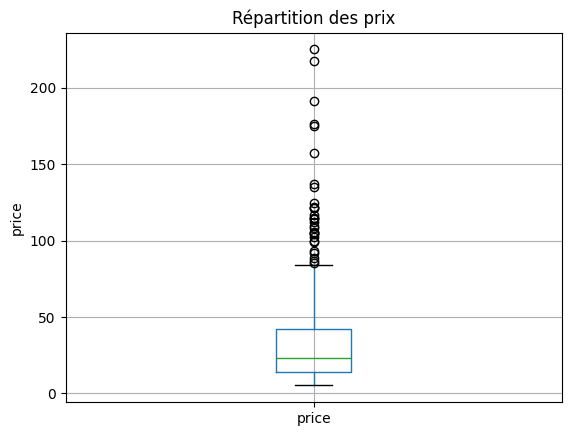

In [ ]:
import matplotlib.pyplot as plt

df_merge.boxplot(column=['price'])
plt.title('Répartition des prix')
plt.ylabel('price')
plt.show()

In [ ]:
#Autre méthode avec plotly express


In [ ]:
import plotly.express as px

fig = px.box(df_merge, y='price', title="Répartition des prix")
fig.show()

##Etape 4.2 - Exploration par l'utisation de méthodes statistique

###Etape 4.2.1 - Identification par le Z-index

In [ ]:
#Calculer la moyenne du prix

#Calculer l'écart-type du prix

#Calculer le Z-score


La formule utilisée est :
$$
Z = \frac{X - \mu}{\sigma}
$$

où :

𝑋 est la valeur observée (le prix),

𝜇 est la moyenne du prix (ici 32.33),

𝜎 est l’écart-type du prix (ici 27.60).

In [ ]:
print(f'La moyenne du prix est de : {df_merge["price"].mean():.2f}€')
print(f'L\'écart-type du prix est de : {df_merge["price"].std():.2f}')
print(50*'-')
z_scores = (df_merge["price"] - df_merge["price"].mean()) / df_merge["price"].std()
print("Le Z-score est de :")
print(z_scores.round(2))

# Afficher les Z-scores extrêmes
print(50*'-')
print(f"Z-score minimum : {z_scores.min():.2f}")
print(f"Z-score maximum : {z_scores.max():.2f}")
# Calcul et affichage du nombre de valeurs aberrantes (|z-score| > 3)
nb_valeurs_aberrantes = (z_scores.abs() > 3).sum()
print(f"Nombre de valeurs aberrantes (|z-score| > 3) : {nb_valeurs_aberrantes}")


La moyenne du prix est de : 32.33€
L'écart-type du prix est de : 27.60
--------------------------------------------------
Le Z-score est de :
0     -0.39
1      0.82
2     -0.73
3     -0.82
4     -0.51
       ... 
709    1.65
710   -0.96
711   -0.16
712   -0.08
713   -0.81
Name: price, Length: 714, dtype: float64
--------------------------------------------------
Z-score minimum : -0.98
Z-score maximum : 6.98
Nombre de valeurs aberrantes (|z-score| > 3) : 13


In [ ]:
#Quel est le seuil prix dont z-score est supérieur à 3?


In [ ]:
print(f'Le seuil prix est de : {df_merge["price"].mean() + 3 * df_merge["price"].std():.2f}€')

Le seuil prix est de : 115.12€


###Etape 4.2.2 - Identification par l'interval interquartile

In [ ]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions


In [ ]:
df_merge["price"].describe()

,price
count,714.000000
mean,32.333683
std,27.596332
min,5.200000
25%,14.062500
50%,23.450000
75%,42.075000
max,225.000000


In [ ]:
#Définissez un seuil pour les articles "outliers" en prix


$$
IQR = Q_3 - Q_1
$$

L'IQR (Intervalle Interquartile) est défini comme la différence entre le troisième quartile (\(Q_3\)) et le premier quartile (\(Q_1\)) d'une distribution. Il représente l'intervalle dans lequel se trouve la moitié centrale des données.


$$
\text{Une valeur } x \text{ est considérée comme aberrante si } x < Q_1 - 1.5 \times \text{IQR} \quad \text{ou} \quad x > Q_3 + 1.5 \times \text{IQR}
$$


In [ ]:
Q1 = df_merge["price"].quantile(0.25)
Q3 = df_merge["price"].quantile(0.75)
IQR = Q3 - Q1

seuil = Q3 + 1.5 * IQR
print(f'Le seuil de détection des outliers (méthode IQR) est de : {seuil:.2f}€')


Le seuil de détection des outliers (méthode IQR) est de : 84.09€


In [ ]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"


In [ ]:
# Calcul du seuil selon la méthode Moyenne + 3×Écart-type
seuil = df_merge["price"].mean() + 3 * df_merge["price"].std()

# Nombre d'articles outliers
n_outliers = df_merge[df_merge["price"] > seuil].shape[0]

# Proportion d'articles outliers par rapport au total
proportion_outliers = n_outliers / df_merge.shape[0]

print(f"Nombre d'articles outliers : {n_outliers}")
print(f"Proportion d'articles outliers : {proportion_outliers:.2%}")


Nombre d'articles outliers : 13
Proportion d'articles outliers : 1.82%


In [ ]:
# Calcul des quartiles et de l'IQR
Q1 = df_merge["price"].quantile(0.25)
Q3 = df_merge["price"].quantile(0.75)
IQR = Q3 - Q1

# Seuil d'outliers selon la méthode IQR
seuil_iqr = Q3 + 1.5 * IQR

# Nombre d'articles outliers
n_outliers_iqr = df_merge[df_merge["price"] > seuil_iqr].shape[0]

# Proportion d'articles outliers
proportion_outliers_iqr = n_outliers_iqr / df_merge.shape[0]

print(f"Nombre d'articles outliers (méthode IQR) : {n_outliers_iqr}")
print(f"Proportion d'articles outliers (méthode IQR) : {proportion_outliers_iqr:.2%}")


Nombre d'articles outliers (méthode IQR) : 31
Proportion d'articles outliers (méthode IQR) : 4.34%


In [ ]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?


In [ ]:
# Filtrer les outliers
outliers = df_merge[df_merge["price"] > seuil_iqr]
# Vérifier les catégories des outliers
outliers_categories = outliers.groupby("product_type")["price"].count().reset_index()
display(outliers_categories)

fig = px.box(df_merge, x="product_type", y="price", points="outliers",
             title="Répartition des prix par catégorie avec outliers")
fig.show()

,product_type,price
0,Champagne,6
1,Cognac,4
2,Vin,18
3,Whisky,3


La méthode IQR(Q3+1.5×IQR) est plus robuste en présence de distributions asymétriques ou de données comportant déjà des outliers.

La méthode Moyenne + 3×Écart-type est plus adaptée en cas de distribution normale.

Toutefois, dans le commerce des vins, spiritueux et produits haut de gamme, il est courant d'observer des prix avec une longue traîne (certains produits étant naturellement plus chers que la majorité des articles). Dans ce contexte, l'IQR peut parfois exclure des valeurs qui ne sont pas réellement des anomalies.

Une approche hybride est recommandée : appliquer l'IQR sur des sous-groupes (types de produits) et comparer avec le Z-score pour éviter d’exclure des produits haut de gamme légitimes.

#Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié

##Etape 5.1 - Analyse des ventes en CA

In [ ]:
##############################
# Calculer le CA su site web #
##############################

#Créez une colonne calculant le CA par article

#Calculez la somme de la colonne "ca_par_article"
#Ce résultat correspond au chiffre d'affaire du site web


In [ ]:
df_merge["ca_par_article"] = df_merge["price"] * df_merge["total_sales"]
chiffre_affaire_site_web = df_merge["ca_par_article"].sum()
print(f"Le chiffre d'affaires total du site web est de : {chiffre_affaire_site_web:,.2f}€".replace(",", " "))

Le chiffre d'affaires total du site web est de : 143 680.10€


In [ ]:
###############################
# Palmares des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge

#Réinitialiser l'index du dataset par un reset_index

#Afficher les 20 premier articles en CA

#Graphique en barre des 20 premiers articles avec plotly express


In [ ]:
df_merge = df_merge.sort_values(by='ca_par_article', ascending=False).copy()
df_merge.reset_index(drop=True, inplace=True)
top_20_articles_ca = df_merge.head(20)
display(top_20_articles_ca)


fig = px.bar(
    top_20_articles_ca,
    x="post_title",
    y="ca_par_article",
    title="Top 20 des articles en chiffre d'affaires",
    text="ca_par_article",
    labels={"ca_par_article": "Chiffre d'affaires (€)", "post_title": "Article"},
    color_discrete_sequence=["#1f77b4"]  # bleu, par exemple
)

fig.update_traces(texttemplate='%{text:,.0f}€', textposition='outside')
fig.update_layout(
    width=1700,  # Augmente la largeur
    height=800   # Augmente la hauteur
)

fig.show()

,product_id,price,stock_quantity,stock_status,purchase_price,sku,total_sales,product_type,post_title,ca_par_article
0,4352,225.0,0,outofstock,137.81,15940,11.0,Champagne,Champagne Egly-Ouriet Grand Cru Millésimé 2008,2475.0
1,5892,191.3,98,instock,116.06,14983,6.0,Champagne,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,1147.8
2,4353,79.5,127,instock,45.91,12587,14.0,Champagne,Champagne Egly-Ouriet Grand Cru Brut Rosé,1113.0
3,5826,41.2,34,instock,21.71,15325,20.0,Vin,Agnès Levet Côte Rôtie Améthyste 2017,824.0
4,6212,115.0,16,instock,59.42,13996,7.0,Vin,Domaine des Comtes Lafon Volnay 1er Cru Santen...,805.0
5,5026,86.8,101,instock,50.13,13913,9.0,Champagne,Champagne Agrapart &amp; Fils Minéral Extra Br...,781.2
6,5008,105.0,12,instock,56.42,11602,7.0,Vin,Domaine des Comtes Lafon Volnay 1er Cru Santen...,735.0
7,5767,175.0,12,instock,90.42,15185,4.0,Vin,Camille Giroud Clos de Vougeot 2016,700.0
8,6126,135.0,138,instock,80.33,14923,5.0,Champagne,Champagne Gosset Célébris Vintage 2007,675.0
9,5025,112.0,136,instock,68.60,13914,6.0,Champagne,Champagne Agrapart &amp; Fils L'Avizoise Extra...,672.0


In [ ]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée

#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA

#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web


In [ ]:
df_merge ["part_ca"] = (df_merge ["ca_par_article"] / chiffre_affaire_site_web)*100
print(f"Vérification : {df_merge ['part_ca'].sum():.2f}")  # Doit être ~100 (100%)
df_merge[["part_ca"]]



Vérification : 100.00


,part_ca
0,1.722577
1,0.798858
2,0.774638
3,0.573496
4,0.560272
...,...
709,0.000000
710,0.000000
711,0.000000
712,0.000000


In [ ]:
df_merge ["cum_part_ca"] = df_merge ["part_ca"].cumsum()
display(df_merge [["part_ca", "cum_part_ca"]])

,part_ca,cum_part_ca
0,1.722577,1.722577
1,0.798858,2.521435
2,0.774638,3.296072
3,0.573496,3.869569
4,0.560272,4.429841
...,...,...
709,0.000000,100.000000
710,0.000000,100.000000
711,0.000000,100.000000
712,0.000000,100.000000


In [ ]:
# Trouver le nombre d'articles qui cumulent 80% du chiffre d'affaires
articles_80_pourcent = df_merge[df_merge["cum_part_ca"] <= 80].shape[0]

# Afficher le résultat
print(f"Nombre d'articles représentant 80% du chiffre d'affaires : {articles_80_pourcent}")


Nombre d'articles représentant 80% du chiffre d'affaires : 434


In [ ]:
# Calcul de la proportion des articles représentant 80% du CA sur l'ensemble du catalogue
proportion_articles_80_ca = articles_80_pourcent / df_merge.shape[0]

# Affichage du résultat sous forme de pourcentage
print(f"Proportion des articles représentant 80% du CA : {proportion_articles_80_ca:.2%}")


Proportion des articles représentant 80% du CA : 60.78%


In [ ]:
articles_pareto_ca = df_merge[df_merge["cum_part_ca"] <= 80]
display(articles_pareto_ca[["post_title", "total_sales", "part_ca", "cum_part_ca"]])


,post_title,total_sales,part_ca,cum_part_ca
0,Champagne Egly-Ouriet Grand Cru Millésimé 2008,11.0,1.722577,1.722577
1,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,6.0,0.798858,2.521435
2,Champagne Egly-Ouriet Grand Cru Brut Rosé,14.0,0.774638,3.296072
3,Agnès Levet Côte Rôtie Améthyste 2017,20.0,0.573496,3.869569
4,Domaine des Comtes Lafon Volnay 1er Cru Santen...,7.0,0.560272,4.429841
...,...,...,...,...
429,Château Dutruch Grand Poujeaux Moulis 2016,8.0,0.103007,79.573859
430,La Cotelleraie Saint-Nicolas-de-Bourgueil Le V...,9.0,0.102728,79.676587
431,Maurice Schoech Gewurztraminer Vendanges Tardi...,5.0,0.102659,79.779246
432,Plateau des Chênes Lirac 2015,10.0,0.102311,79.881556


##Etape 5.2 - Analyse des ventes en Quantités

In [ ]:
#####################################
# Palmares des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge

#Réinitialiser l'index du dataset par un reset_index

#Afficher les 20 premier articles en quantité

#Graphique en barre des 20 premiers articles avec plotly express


In [ ]:
df_merge= df_merge.sort_values(by='total_sales', ascending=False).copy()
df_merge.reset_index(drop=True, inplace=True)
top_20_articles_qt = df_merge.head(20)
display(top_20_articles_qt[["sku", "price", "total_sales", "ca_par_article", "product_id"]])


,sku,price,total_sales,ca_par_article,product_id
0,16148,9.9,36.0,356.4,4867
1,15415,9.9,27.0,267.3,4203
2,14864,14.9,24.0,357.6,4275
3,16525,28.5,22.0,627.0,4647
4,14950,12.7,22.0,279.4,4726
5,14570,5.2,20.0,104.0,6129
6,15325,41.2,20.0,824.0,5826
7,15758,11.6,18.0,208.8,4220
8,13572,17.1,17.0,290.7,5803
9,15705,29.0,17.0,493.0,6569


In [ ]:
fig = px.bar(
    top_20_articles_qt,
    x="post_title",
    y="total_sales",
    title="Top 20 des articles des ventes (quantité)",
    text="total_sales",
    labels={"total_sales": "Volume de ventes", "post_title": "Article"}, # Adjust label for the x-axis.
    color="total_sales",
    color_continuous_scale="blues")

fig.update_traces(texttemplate='%{text:,.0f}', textposition='outside')
fig.update_layout(
    width=1700,  # Augmente la largeur
    height=800   # Augmente la hauteur
)

fig.show()

In [ ]:
#############################
# Calculer le 20 / 80 en QT #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée

#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité

#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web


In [ ]:
df_merge["part_qt"] = (df_merge["total_sales"] / df_merge["total_sales"].sum()) * 100

print(f"Vérification : {df_merge ['part_qt'].sum():.2f}")  # Doit être ~100 (100%)

df_merge [["part_qt"]]


Vérification : 100.00


,part_qt
0,0.625978
1,0.469484
2,0.417319
3,0.382542
4,0.382542
...,...
709,0.000000
710,0.000000
711,0.000000
712,0.000000


In [ ]:
df_merge ["cum_part_qt"] = df_merge ["part_qt"].cumsum()
display(df_merge [["part_qt", "cum_part_qt"]])

,part_qt,cum_part_qt
0,0.625978,0.625978
1,0.469484,1.095462
2,0.417319,1.512780
3,0.382542,1.895323
4,0.382542,2.277865
...,...,...
709,0.000000,100.000000
710,0.000000,100.000000
711,0.000000,100.000000
712,0.000000,100.000000


In [ ]:
# Trouver le nombre d'articles qui cumulent 80% du chiffre d'affaires
articles_80_pourcent_qt = df_merge[df_merge["cum_part_qt"] <= 80].shape[0]

# Afficher le résultat
print(f"Nombre d'articles représentant 80% des ventes en quantité : {articles_80_pourcent_qt}")

Nombre d'articles représentant 80% des ventes en quantité : 433


In [ ]:
proportion_articles_80_qt = (articles_80_pourcent_qt / df_merge.shape[0]) * 100
print(f"Proportion des articles représentant 80% des ventes en quantité : {proportion_articles_80_qt:.2f}%")


Proportion des articles représentant 80% des ventes en quantité : 60.64%


In [ ]:
articles_pareto_qt = df_merge[df_merge["cum_part_qt"] <= 80]
display(articles_pareto_qt[["post_title", "total_sales", "part_qt", "cum_part_qt"]])


,post_title,total_sales,part_qt,cum_part_qt
0,Château De La Selve IGP Coteaux de l'Ardèche M...,36.0,0.625978,0.625978
1,Mas Laval IGP Pays d'Hérault Les Pampres Blanc...,27.0,0.469484,1.095462
2,I Fabbri Chianti Classico Lamole 2017,24.0,0.417319,1.512780
3,Bernard Baudry Chinon Rouge La Croix Boissée 2017,22.0,0.382542,1.895323
4,François Baur Pinot Noir Schlittweg 2017,22.0,0.382542,2.277865
...,...,...,...,...
428,Cosse-Maisonneuve Cahors Le Sid 2014,7.0,0.121718,79.499218
429,Mas de Daumas Gassac IGP Saint-Guilhem-le-Dése...,7.0,0.121718,79.620935
430,Zind-Humbrecht Riesling Herrenweg de Turckheim...,7.0,0.121718,79.742653
431,"Rimauresq Côtes de Provence Rouge Cru Classé ""...",7.0,0.121718,79.864371


##Etape 5.3 - Analyse des stocks

In [ ]:
######################################
# Calcule le nombre de mois de stock #
######################################

#Import de numpy

#Création de la colonne Rotation de stock

#Remplacement des "inf" par 0

#Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge

#Graphique en barre du flop 20 des produits qui ont le plus de mois de stock

La rotation de stock est définie comme :
$$\text{Rotation de stock} = \frac{\text{total_sales}}{\text{stock_quantity}}$$



In [ ]:
import numpy as np

# 1) Calcul du taux de rotation
#    Remplacez d'abord les stock_quantity = 0 par NaN pour éviter la division par zéro
df_merge['rotation_stock'] = (
    df_merge['total_sales']
    / df_merge['stock_quantity'].replace(0, np.nan)
)

# 2) Gérer les Inf et NaN dans rotation_stock
#    - Les divisions par zéro donnent Inf
#    - On remplace Inf par NaN, puis NaN par 0
df_merge['rotation_stock'] = (
    df_merge['rotation_stock']
    .replace([np.inf, -np.inf], np.nan)  # Remplacer les Inf par NaN
    .fillna(0)                           # Remplacer les NaN par 0
)

# 3) Calcul du nombre de mois de stock
#    - Si rotation_stock = 0, alors 12 / 0 = Inf
#    - On remplace rotation_stock=0 par NaN pour éviter la division par 0
df_merge['mois_stock'] = 12 / df_merge['rotation_stock'].replace(0, np.nan)

# 4) Gérer les Inf et NaN dans mois_stock
#    - Les produits avec rotation_stock=0 (pas de ventes) ont mois_stock = Inf
#    - On choisit de remplacer Inf par 0
df_merge['mois_stock'] = (
    df_merge['mois_stock']
    .replace([np.inf, -np.inf], np.nan)
    .fillna(0)
)

# 5) Tri décroissant sur le nombre de mois de stock
df_merge_sorted_stk = df_merge.sort_values(by='mois_stock', ascending=False)

# 6) Réinitialisation de l'index
df_merge_sorted_stk.reset_index(drop=True, inplace=True)

# 7) Affichage de quelques colonnes pour vérification
display(df_merge_sorted_stk[['sku', 'mois_stock', 'rotation_stock']].head(20))


,sku,mois_stock,rotation_stock
0,11641,375.000000,0.032000
1,14923,331.200000,0.036232
2,12585,324.000000,0.037037
3,12586,300.000000,0.040000
4,1364,284.000000,0.042254
5,9562,276.000000,0.043478
6,1662,273.000000,0.043956
7,13914,272.000000,0.044118
8,12588,248.571429,0.048276
9,1366,246.000000,0.048780


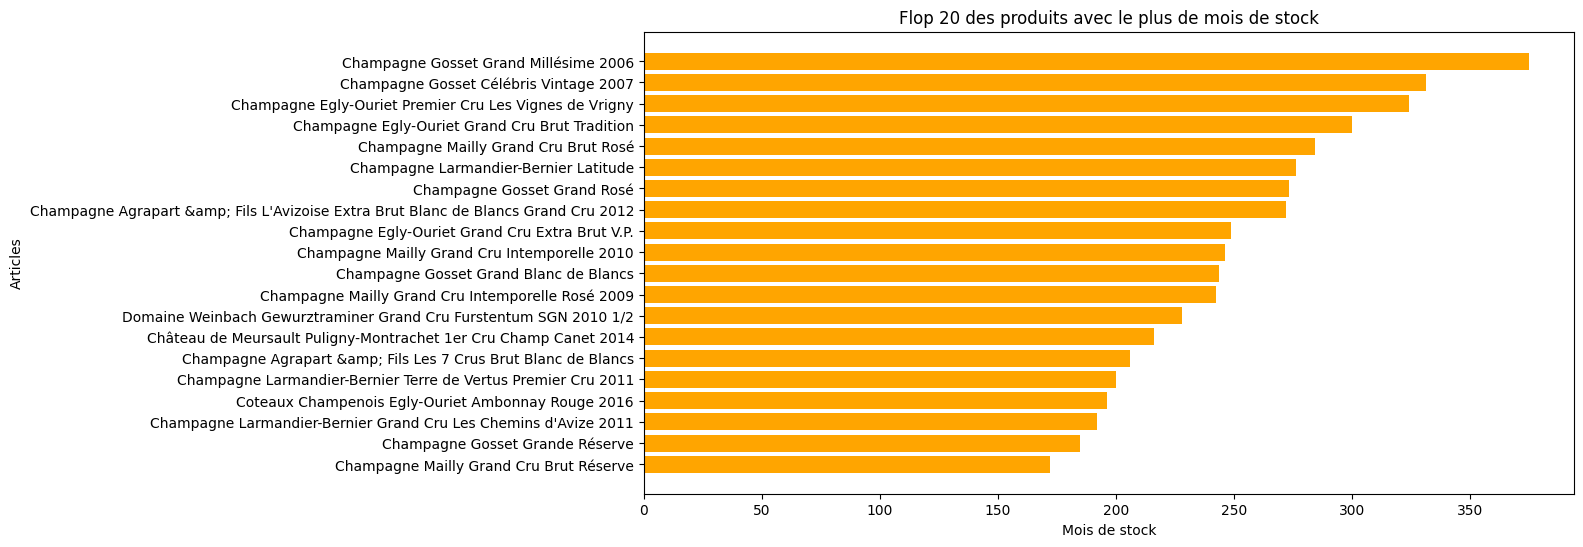

In [ ]:
import matplotlib.pyplot as plt

# Sélection des 20 produits avec le plus de mois de stock
top_mois_stock = df_merge_sorted_stk.head(20)

# Création du graphique
plt.figure(figsize=(12, 6))
plt.barh(top_mois_stock['post_title'].astype(str), top_mois_stock['mois_stock'], color='orange')

# Ajout des labels et du titre
plt.xlabel("Mois de stock")
plt.ylabel("Articles")
plt.title("Flop 20 des produits avec le plus de mois de stock")
plt.gca().invert_yaxis()  # Inversion de l'axe pour mettre le plus grand en haut

# Affichage
plt.show()


In [ ]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros

#Calculer la somme de la colonne "Valorisation_stock_euros"

In [ ]:
df_merge_sorted_stk["valorisation_stock_euros"] = (
    df_merge_sorted_stk["stock_quantity"] * df_merge_sorted_stk["purchase_price"]
)
total_valorisation = df_merge_sorted_stk["valorisation_stock_euros"].sum()
print(f"La valorisation totale du stock est de {total_valorisation:,.2f} euros.".replace(',', ' '))

La valorisation totale du stock est de 277 305.77 euros.


In [ ]:
# Sélection des produits avec le plus de mois de stock (Top 20)
stock_immobilise = df_merge_sorted_stk.head(20)

# Calcul de la valorisation financière de ces stocks
valorisation_stock_immobilise = stock_immobilise["valorisation_stock_euros"].sum()

# Calcul du pourcentage du stock immobilisé
pourcentage_immobilise = (valorisation_stock_immobilise / total_valorisation) * 100

# Affichage des résultats
print(f"Impact financier du stock immobilisé : {valorisation_stock_immobilise:,.2f} euros.".replace(',', ' '))
print(f"Ce stock représente {pourcentage_immobilise:.2f}% de la valorisation totale du stock.")



Impact financier du stock immobilisé : 87 108.25 euros.
Ce stock représente 31.41% de la valorisation totale du stock.


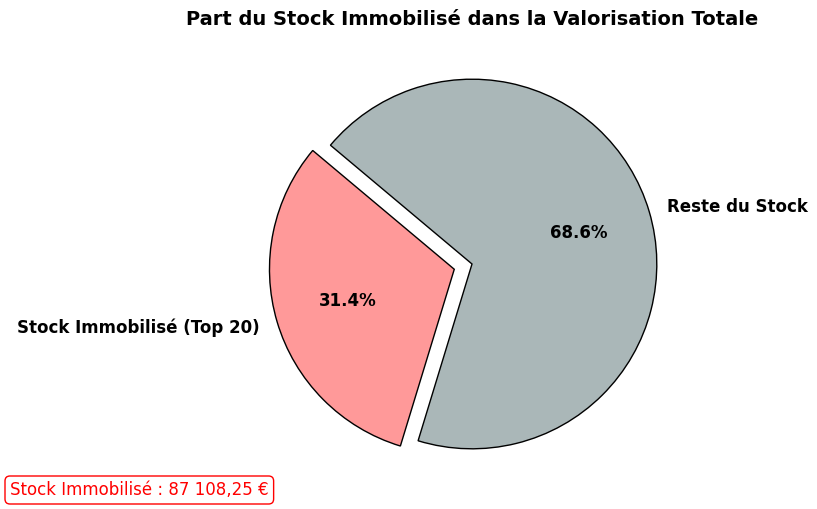

In [ ]:
import matplotlib.pyplot as plt

# Données
stock_immobilise_pourcentage = 31.4  # Pourcentage du stock immobilisé (Top 20)
reste_stock_pourcentage = 100 - stock_immobilise_pourcentage  # Reste du stock

# Labels et valeurs
labels = ["Stock Immobilisé (Top 20)", "Reste du Stock"]
sizes = [stock_immobilise_pourcentage, reste_stock_pourcentage]
colors = ["#FF9999", "#AAB7B8"]  # Rouge clair pour le stock immobilisé, gris pour le reste

# Création du diagramme camembert
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=140,
    colors=colors,
    explode=(0.1, 0),  # Mettre en avant le stock immobilisé
    wedgeprops={"edgecolor": "black"},
    textprops={"fontsize": 12, "weight": "bold"}
)

# Titre amélioré
plt.title("Part du Stock Immobilisé dans la Valorisation Totale", fontsize=14, weight="bold")

# Annotation positionnée en bas à gauche
plt.annotate(
    "Stock Immobilisé : 87 108,25 €",
    xy=(-0.5, 0),  # Coordonnées ajustées pour être en bas à gauche
    xycoords="axes fraction",
    fontsize=12,
    color="red",
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="red", facecolor="white")
)

# Affichage du graphique
plt.show()


In [ ]:
##############################################
# Valorisation du nombre de produit en stock #
##############################################

total_stock = df_merge_sorted_stk["stock_quantity"].sum()
print(f"Le nombre total de produits en stock est de {total_stock:,.0f} produits.".replace(',', ' '))

Le nombre total de produits en stock est de 16 739 produits.


##Etape 5.4 - Analyse du taux de marge

In [ ]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne prix HT

#Création de la colonne Taux de marge

#Afficher le prix minimum de la colonne "taux_marge"

#Afficher le prix maximum de la colonne "taux_marge"


La formule pour extraire le prix hors taxes (HT) à partir du prix TTC est :
$$\text{Prix HT} = \frac{\text{Prix TTC}}{1 + \text{TVA}}$$

In [ ]:
display(df_merge['product_type'].unique())

array(['Vin', 'Champagne', 'Gin', "Huile d'olive", 'Cognac', 'Whisky',
       'Autre'], dtype=object)

In [ ]:
# Dictionnaire des taux de TVA par type de produit
tva_dict = {
    'Vin': 0.20,
    'Whisky': 0.20,
    'Huile d\'olive': 0.055,
    'Champagne': 0.20,
    'Cognac': 0.20,
    'Gin': 0.20,
    'Autre': 0.00  # Pas de TVA pour les bons d'achat
}

# Fonction pour calculer le prix HT
def calcul_prix_ht(row):
    tva = tva_dict.get(row['product_type'], 0)  # Récupérer la TVA selon le type de produit
    return row['price'] / (1 + tva)  # Appliquer la formule

# Ajouter la colonne Prix_HT
df_merge['prix_ht'] = df_merge.apply(calcul_prix_ht, axis=1)

# Afficher le DataFrame avec la nouvelle colonne
display(df_merge[['sku', 'prix_ht']].head())

,sku,prix_ht
0,16148,8.250000
1,15415,8.250000
2,14864,12.416667
3,16525,23.750000
4,14950,10.583333


Pour calculer la Taux de Marge, la formule classique est la suivante :

$$\text{Taux de Marge} = \left( \frac{\text{Prix HT} - \text{Prix d'achat}}{\text{Prix d'achat}} \right) \times 100$$


In [ ]:
# Calcul du taux de marge en pourcentage
df_merge['taux_marge'] = ((df_merge['prix_ht'] - df_merge['purchase_price']) / df_merge['purchase_price']) * 100

# Affichage du DataFrame avec la nouvelle colonne
display(df_merge[['sku', 'taux_marge']].head())

,sku,taux_marge
0,16148,69.753086
1,15415,64.670659
2,14864,59.597258
3,16525,67.963225
4,14950,55.180841


In [ ]:
# Afficher le taux de marge minimum
taux_marge_min = df_merge['taux_marge'].min()

# Afficher le taux de marge maximum
taux_marge_max = df_merge['taux_marge'].max()

print(f"Taux de Marge Minimum : {taux_marge_min:.2f} %")
print(f"Taux de Marge Maximum : {taux_marge_max:.2f} %")


Taux de Marge Minimum : -86.39 %
Taux de Marge Maximum : 91.41 %


In [ ]:
#affichage de la ligne avec un taux de marge inférieur à 0


In [ ]:
# Filtrer les lignes où le taux de marge est inférieur à 0
df_marge_negative = df_merge[df_merge['taux_marge'] < 0]

# Afficher le DataFrame filtré
display(df_marge_negative[['product_id', 'price', 'stock_quantity', 'purchase_price', 'sku', 'post_title', 'taux_marge']])


,product_id,price,stock_quantity,purchase_price,sku,post_title,taux_marge
698,4355,12.65,97,77.48,12589,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,-86.394338


Avec une erreur aussi importante sur le taux de marge, il est fort probable qu'elle soit due à une erreur de saisie, notamment sur le prix d'achat ou le prix de vente.

In [ ]:
#création d'un dataframe avec les taux positifs

#Afficher le prix minimum de la colonne "taux_marge"

#Afficher le prix maximum de la colonne "taux_marge"


In [ ]:
#création d'un dataframe avec le taux de marge moyen par type de produit

#Affichage dans un graphique du taux de marge par type de produit


In [ ]:
# Filtrer les lignes où le taux de marge est positif
df_marge_positive = df_merge[df_merge['taux_marge'] > 0]

# Afficher le DataFrame filtré
display(df_marge_positive)

# Calcul du taux de marge minimum et maximum sur les valeurs positives
taux_marge_min = df_marge_positive['taux_marge'].min()
taux_marge_max = df_marge_positive['taux_marge'].max()

print(f"Taux de Marge Minimum (positif) : {taux_marge_min:.2f} %")
print(f"Taux de Marge Maximum (positif) : {taux_marge_max:.2f} %")


,product_id,price,stock_quantity,stock_status,purchase_price,sku,total_sales,product_type,post_title,ca_par_article,part_ca,cum_part_ca,part_qt,cum_part_qt,rotation_stock,mois_stock,prix_ht,taux_marge
0,4867,9.9,121,instock,4.86,16148,36.0,Vin,Château De La Selve IGP Coteaux de l'Ardèche M...,356.4,0.248051,22.799330,0.625978,0.625978,0.297521,40.333333,8.250000,69.753086
1,4203,9.9,74,instock,5.01,15415,27.0,Vin,Mas Laval IGP Pays d'Hérault Les Pampres Blanc...,267.3,0.186038,40.239045,0.469484,1.095462,0.364865,32.888889,8.250000,64.670659
2,4275,14.9,62,instock,7.78,14864,24.0,Vin,I Fabbri Chianti Classico Lamole 2017,357.6,0.248886,21.557543,0.417319,1.512780,0.387097,31.000000,12.416667,59.597258
3,4647,28.5,45,instock,14.14,16525,22.0,Vin,Bernard Baudry Chinon Rouge La Croix Boissée 2017,627.0,0.436386,8.224243,0.382542,1.895323,0.488889,24.545455,23.750000,67.963225
4,4726,12.7,0,outofstock,6.82,14950,22.0,Vin,François Baur Pinot Noir Schlittweg 2017,279.4,0.194460,36.807324,0.382542,2.277865,0.000000,0.000000,10.583333,55.180841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,4337,83.0,145,instock,48.90,4679,0.0,Champagne,Champagne Mailly Grand Cru Les Echansons 2007,0.0,0.000000,100.000000,0.000000,100.000000,0.000000,0.000000,69.166667,41.445126
710,3850,20.8,0,outofstock,10.64,15300,0.0,Vin,Pierre Jean Villa Crozes-Hermitage Accroche Co...,0.0,0.000000,100.000000,0.000000,100.000000,0.000000,0.000000,17.333333,62.907268
711,4876,22.8,0,outofstock,11.90,16289,0.0,Vin,Tempier Bandol Rosé 2019,0.0,0.000000,100.000000,0.000000,100.000000,0.000000,0.000000,19.000000,59.663866
712,4198,5.8,0,outofstock,2.97,16322,0.0,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,0.0,0.000000,100.000000,0.000000,100.000000,0.000000,0.000000,4.833333,62.738496


Taux de Marge Minimum (positif) : 30.73 %
Taux de Marge Maximum (positif) : 91.41 %


In [ ]:
# Filtrer les produits à marge négative
df_marge_negative = df_merge[df_merge['taux_marge'] < 0].copy()

# Calculer la perte potentielle par produit
df_marge_negative['perte_potentielle'] = (df_marge_negative['prix_ht'] - df_marge_negative['purchase_price']) * df_marge_negative['stock_quantity']

# Total de la perte potentielle
total_perte = df_marge_negative['perte_potentielle'].sum()

# Afficher les résultats
print(f"🔴 Perte financière estimée sur les produits déficitaires : {total_perte:,.2f} €".replace(',', ' '))

# Top 5 des produits les plus déficitaires
df_top_pertes = df_marge_negative[['post_title', 'perte_potentielle', 'taux_marge', 'stock_quantity']].sort_values(by='perte_potentielle', ascending=True).head(5)


# Afficher le tableau des pertes principales
display(df_top_pertes)


🔴 Perte financière estimée sur les produits déficitaires : -6 493.02 €


,post_title,perte_potentielle,taux_marge,stock_quantity
698,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,-6493.018333,-86.394338,97


##Etape 5.5 - Analyse des correlations entre les variables stock, sales et price

In [ ]:
############################
# Analyse des correlations #
############################

#Importation de Seaborn

#Création d'un heatmap de correlation avec les variables stock, sales et price
#on peut également créer un mask pour n'afficher qu'une demi heatmap

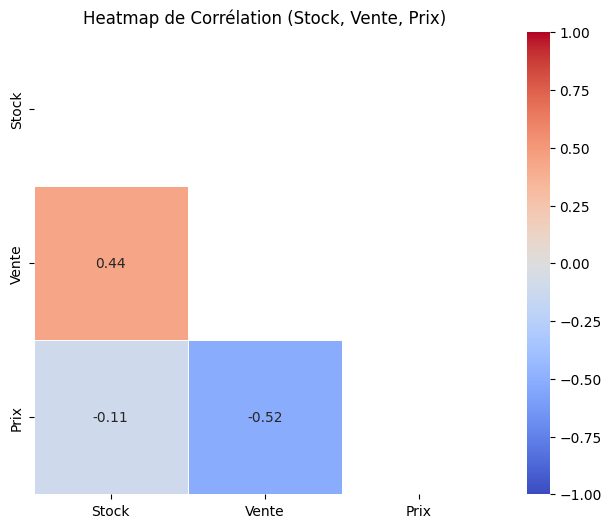

In [ ]:
import seaborn as sns

# Calcul de la matrice de corrélation avec renaming des colonnes
correlation_matrix = df_merge[["stock_quantity", "total_sales", "price"]].corr()

# Renommage des colonnes et des index pour l'affichage
correlation_matrix.rename(index={"stock_quantity": "Stock", "total_sales": "Vente", "price": "Prix"},
                          columns={"stock_quantity": "Stock", "total_sales": "Vente", "price": "Prix"},
                          inplace=True)

# Création d'un masque pour afficher uniquement la moitié supérieure de la heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Création de la figure
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask,
            linewidths=0.5, square=True, vmin=-1, vmax=1)

# Titre du graphique
plt.title("Heatmap de Corrélation (Stock, Vente, Prix)")
plt.show()


In [ ]:
#Que peut-on conclure des correlations ?

D'après la heatmap de corrélation, voici les principales conclusions :

1.   Corrélation positive entre total_sales et stock_quantity (+0.44)
La corrélation positive entre stock et ventes (+0.44) signifie que les produits qui ont plus de stock sont souvent ceux qui se vendent le mieux.
Cependant, cela ne veut pas dire que mettre plus de stock entraîne automatiquement plus de ventes.
Il est possible que :
    +   Ce soit les produits populaires qui sont davantage stockés pour éviter les ruptures.
    +   Il y ait d’autres facteurs qui influencent les ventes, comme la demande des clients ou des promotions.

2.  Corrélation négative entre price et total_sales (-0.52)
Une corrélation négative modérée signifie que lorsque le prix augmente, les ventes diminuent.

3.  Corrélation légèrement négative entre price et stock_quantity (-0.11)
La corrélation est faible mais négative.
Cela peut suggérer que les produits les plus chers sont moins stockés, mais la relation n’est pas forte.



##Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel

In [ ]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.


In [ ]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_merge.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_merge.shape[1]))

Le tableau comporte 714 observation(s) ou article(s)
Le tableau comporte 18 colonne(s)


In [ ]:
df_merge.to_excel("df_merge.xlsx", index=False)